---

<div align=center>
<a href='https://mp.weixin.qq.com/mp/appmsgalbum?__biz=Mzg2OTU4NzI3NQ==&action=getalbum&album_id=1764511202329624577&scene=126#wechat_redirect'> 
<img src=https://github.com/datoujinggzj/WhaleDataAnalysisProject/blob/master/pic/shanghai.png?raw=true width='400' />
</div>

👇👇👇点击可跳转！

[第三阶段：数据分析](#第二阶段：数据处理&数据分析)

- [数据分析](#数据分析)
   - [数据质检](#数据质检)
   - [数据可视化](#数据可视化)
   - [结果分析](#结果分析)

<div class="alert alert-block alert-danger">
<b>注意：</b>

- 需要翻墙才可下载数据和观看油管视频哦！
- 在线看HTML显示不全，请下载到本地操作哦！
- 记得解锁代码再去run哦！
    
</div>

<div class="alert alert-block alert-warning">
<b>【上海新冠疫情数据分析】项目日志</b>

第二阶段：【数据处理&数据分析】
    
第二节阶段核心目的：数据清洗、处理以及转化，以及数据质检及可视化的相关步骤，最后带大家解释结果。
    
难度（最高5星）：⭐⭐⭐

Good Luck!
</div>


# 第三阶段：数据分析

In [2]:
# import packages

# data processing
import pandas as pd
import numpy as np
from datetime import timedelta, datetime


import re

# data visualization
from tabulate import tabulate
import plotly.graph_objs as go
from plotly.graph_objs import Bar, Layout
from plotly import offline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

# change text color
import colorama
from colorama import Fore, Style

# IPython
from IPython.display import IFrame

## 数据处理

首先，我们要处理上一阶段得到的时间序列、横截面数据。

时间序列数据：

- time_series_covid19_confirmed_US.csv
- time_series_covid19_confirmed_global.csv
- time_series_covid19_deaths_US.csv
- time_series_covid19_deaths_global.csv
- time_series_covid19_recovered_global.csv

横截面数据：

- csse_covid_19_daily_reports
- csse_covid_19_daily_reports_us

正在读取【横截面】数据......
读取完毕
正在读取【时间序列】数据......
读取完毕
正在获取并处理【上海】数据（数据来自上海卫健委）......
读取完毕


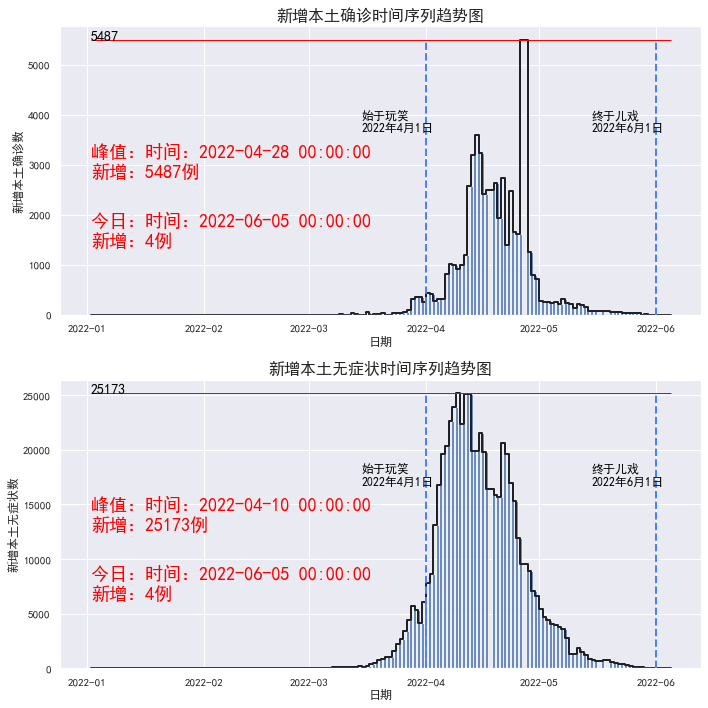

In [3]:
from getdata import GET_csse_covid_19_daily_reports,GET_csse_covid_19_time_series,GET_shanghai_data

# get data
latest_data_global,prev_data_global,latest_data_us,prev_data_us = GET_csse_covid_19_daily_reports()
ts_confirmed_us,ts_confirmed_global,ts_deaths_us,ts_deaths_global,ts_recovered_global = GET_csse_covid_19_time_series()
ts_shanghai_covid = GET_shanghai_data(plot=True)  # 这里包含近10天的上海无症状新增趋势！

In [4]:
from data_processing import ts_process_CHINA,ts_process_US,daily_process

In [5]:
ts_confirmed_CHINA_incre, loc_data_CHINA, sorted_provinces = ts_process_CHINA(ts_confirmed_global,clip=False)
ts_deaths_CHINA_incre, _, _ = ts_process_CHINA(ts_deaths_global,clip=False)
ts_recovered_CHINA_incre, _, _ = ts_process_CHINA(ts_recovered_global,clip=False)

In [6]:
ts_confirmed_US_incre,loc_data_us,sorted_state = ts_process_US(ts_confirmed_us,clip=False)
ts_deaths_US_incre,_,_,population = ts_process_US(ts_deaths_us,death = True,clip=False)

In [7]:
latest_data_CHINA = daily_process(latest_data_global, country = 'China')
prev_data_CHINA = daily_process(prev_data_global, country = 'China')
latest_data_US = daily_process(latest_data_us, country = 'US')
prev_data_US = daily_process(prev_data_us, country = 'US')

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataScienceProject/blob/master/pic/sep.gif?raw=true width='800' />
</div>

## 数据分析

下面，我们来继续数据分析的部分。


那么我们要先进行一下数据的质量检查，准确无误后，正式开始数据可视化部分！

### 数据质检

由于已经设置了`clip=False`，说明我们考虑**负增长**的情况，来看看什么是否发生了负增长吧！

In [8]:
neg_incre_date_CHINA = []
neg_incre_province_CHINA = []
neg_incre_number_CHINA = []
for r,c in sorted(zip(np.where(ts_confirmed_CHINA_incre<0)[0],np.where(ts_confirmed_CHINA_incre<0)[1]),key = lambda x: x[0],reverse=True):
    neg_incre_date_CHINA.append(str(ts_confirmed_CHINA_incre.index[r]))
    neg_incre_province_CHINA.append(ts_confirmed_CHINA_incre.columns[c])
    neg_incre_number_CHINA.append(ts_confirmed_CHINA_incre.iloc[r,c])

In [9]:
print(tabulate(sorted(zip(neg_incre_date_CHINA,
                   neg_incre_province_CHINA,
                   neg_incre_number_CHINA),key = lambda x: abs(x[2]),reverse = True),
              headers = ['负增长日期','发生地点','数量'],tablefmt = 'pretty'))

+---------------------+--------------+------+
|     负增长日期      |   发生地点   | 数量 |
+---------------------+--------------+------+
| 2022-04-20 00:00:00 |   Shanghai   | -589 |
| 2021-10-09 00:00:00 |  Hong Kong   | -23  |
| 2022-04-15 00:00:00 |    Yunnan    | -12  |
| 2020-06-03 00:00:00 |   Jiangxi    |  -5  |
| 2021-10-14 00:00:00 | Heilongjiang |  -4  |
| 2022-02-09 00:00:00 |   Liaoning   |  -1  |
| 2021-10-14 00:00:00 |    Hebei     |  -1  |
| 2021-09-03 00:00:00 |  Hong Kong   |  -1  |
| 2021-06-28 00:00:00 |   Beijing    |  -1  |
| 2020-10-25 00:00:00 |   Shaanxi    |  -1  |
| 2020-03-18 00:00:00 |   Guizhou    |  -1  |
+---------------------+--------------+------+


可以看到，2021年10月9日，香港发生了最大幅度的负增长，也就是说治愈人数超过了感染人数23人。那么我们再来看看美国的吧！

In [10]:
neg_incre_date_US = []
neg_incre_province_US = []
neg_incre_number_US = []
for r,c in sorted(zip(np.where(ts_confirmed_US_incre<0)[0],np.where(ts_confirmed_US_incre<0)[1]),key = lambda x: x[0],reverse=True):
    neg_incre_date_US.append(str(ts_confirmed_US_incre.index[r]))
    neg_incre_province_US.append(ts_confirmed_US_incre.columns[c])
    neg_incre_number_US.append(ts_confirmed_US_incre.iloc[r,c])
    
    
print(tabulate(sorted(zip(neg_incre_date_US,
                   neg_incre_province_US,
                   neg_incre_number_US),key = lambda x: abs(x[2]),reverse = True),
              headers = ['负增长日期','发生地点','数量'],tablefmt = 'pretty'))

+---------------------+----------------------+-------+
|     负增长日期      |       发生地点       | 数量  |
+---------------------+----------------------+-------+
| 2022-04-04 00:00:00 |        Texas         | -9063 |
| 2021-04-26 00:00:00 |      New Jersey      | -9005 |
| 2022-01-26 00:00:00 |       Alabama        | -8780 |
| 2021-04-17 00:00:00 |       Missouri       | -7698 |
| 2021-03-11 00:00:00 |       Missouri       | -4354 |
| 2022-02-08 00:00:00 |     Pennsylvania     | -4116 |
| 2021-06-29 00:00:00 |      California      | -3938 |
| 2022-05-11 00:00:00 |       Nebraska       | -3764 |
| 2022-05-05 00:00:00 |    South Carolina    | -3073 |
| 2022-05-04 00:00:00 |      Washington      | -2220 |
| 2022-01-18 00:00:00 |        Nevada        | -2153 |
| 2020-03-29 00:00:00 |      California      | -2019 |
| 2022-03-22 00:00:00 |       Missouri       | -1543 |
| 2021-09-22 00:00:00 |       Florida        | -1448 |
| 2021-04-06 00:00:00 |       Oklahoma       | -1294 |
| 2022-04-08 00:00:00

美国负增长的情况就比较多了，尤其是最近的Texas、New Jersey和Missouri等州，都出现了大幅度的负增长，说明这些州在面对奥密克戎的侵袭，已经有了很不错的响应！

那么，请试着写成一个函数吧！

<div class="alert alert-block alert-success"><b>Step 4 Get the detail of negative increments</b>

根据以上内容，请写出一个函数

</div>

In [11]:
def negincre_report(ts_data, sort_by = 0):
    """
    ts_data: time seris data
    sort_by: 0 ==> date
             1 ==> place 
             2 ==> number
    """

很诡异的是，竟然新增死亡数也是可以是负数，确实厉害！

In [14]:
# negincre_report(ts_confirmed_CHINA_incre,sort_by=2)
# 解锁

********************INFO********************
全国负增长的日期：2020-06-03
********************REPORT********************
+---------------------+--------------+------+
|     负增长日期      |   发生地点   | 数量 |
+---------------------+--------------+------+
| 2022-04-20 00:00:00 |   Shanghai   | -589 |
| 2021-10-09 00:00:00 |  Hong Kong   | -23  |
| 2022-04-15 00:00:00 |    Yunnan    | -12  |
| 2020-06-03 00:00:00 |   Jiangxi    |  -5  |
| 2021-10-14 00:00:00 | Heilongjiang |  -4  |
| 2022-02-09 00:00:00 |   Liaoning   |  -1  |
| 2021-10-14 00:00:00 |    Hebei     |  -1  |
| 2021-09-03 00:00:00 |  Hong Kong   |  -1  |
| 2021-06-28 00:00:00 |   Beijing    |  -1  |
| 2020-10-25 00:00:00 |   Shaanxi    |  -1  |
| 2020-03-18 00:00:00 |   Guizhou    |  -1  |
+---------------------+--------------+------+


In [15]:
def dataQC(data):
    # basic info
    print(f"总行数：{Fore.RED}{data.shape[0]}{Style.RESET_ALL}")
    print(f"总列数：{Fore.RED}{data.shape[1]}{Style.RESET_ALL}")
    print(f"总元素数：{data.size}")
    print('-'*50+ f"{Fore.RED}INFO{Style.RESET_ALL}"  + '-'*50)
    print('【基本信息】')
    data.info()

In [16]:
dataQC(latest_data_CHINA)

总行数：33
总列数：6
总元素数：198
--------------------------------------------------INFO--------------------------------------------------
【基本信息】
<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Anhui to Zhejiang
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Province_State       33 non-null     object 
 1   Last_Update          33 non-null     object 
 2   Confirmed            33 non-null     int64  
 3   Deaths               33 non-null     int64  
 4   Incident_Rate        33 non-null     float64
 5   Case_Fatality_Ratio  33 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ KB


### 数据可视化

下面我们来进行数据可视化，为什么要数据可视化呢？

数据的可视化展示,提高了解释信息的能力。从海量的数据和信息中寻找联系并不容易，但是图形和图表可以在几秒内提供信息。一望便知，可提供所需的信息。

以上所述,能提高在工作场所或教育机构的沟通和有效性。数据可视化被普遍认为是一种简单而有效的方法来概括数据，因此它是可以提高人们的共享信息和学习的一种方法。

这里需要大家掌握三个可视化包

（👇👇👇点击链接，进入对应模块学习哦！）

- [Matplotlib](https://gitee.com/gzjzg/WhaleDataScienceProject/tree/master/porto-seguro-safe-driver-prediction/Phase2/Matplotlib)
- [Seaborn](https://gitee.com/gzjzg/WhaleDataScienceProject/tree/master/porto-seguro-safe-driver-prediction/Phase3/Seaborn)
- [Plotly](https://zg104.github.io/Plotly)

In [17]:
IFrame(width="853",height="480",src = "https://www.youtube.com/embed/87jyeklhTH8")

现在，我们来绘制中国各个省的疫情时间序列趋势图。

并加上7天移动平均和30天移动平均曲线。

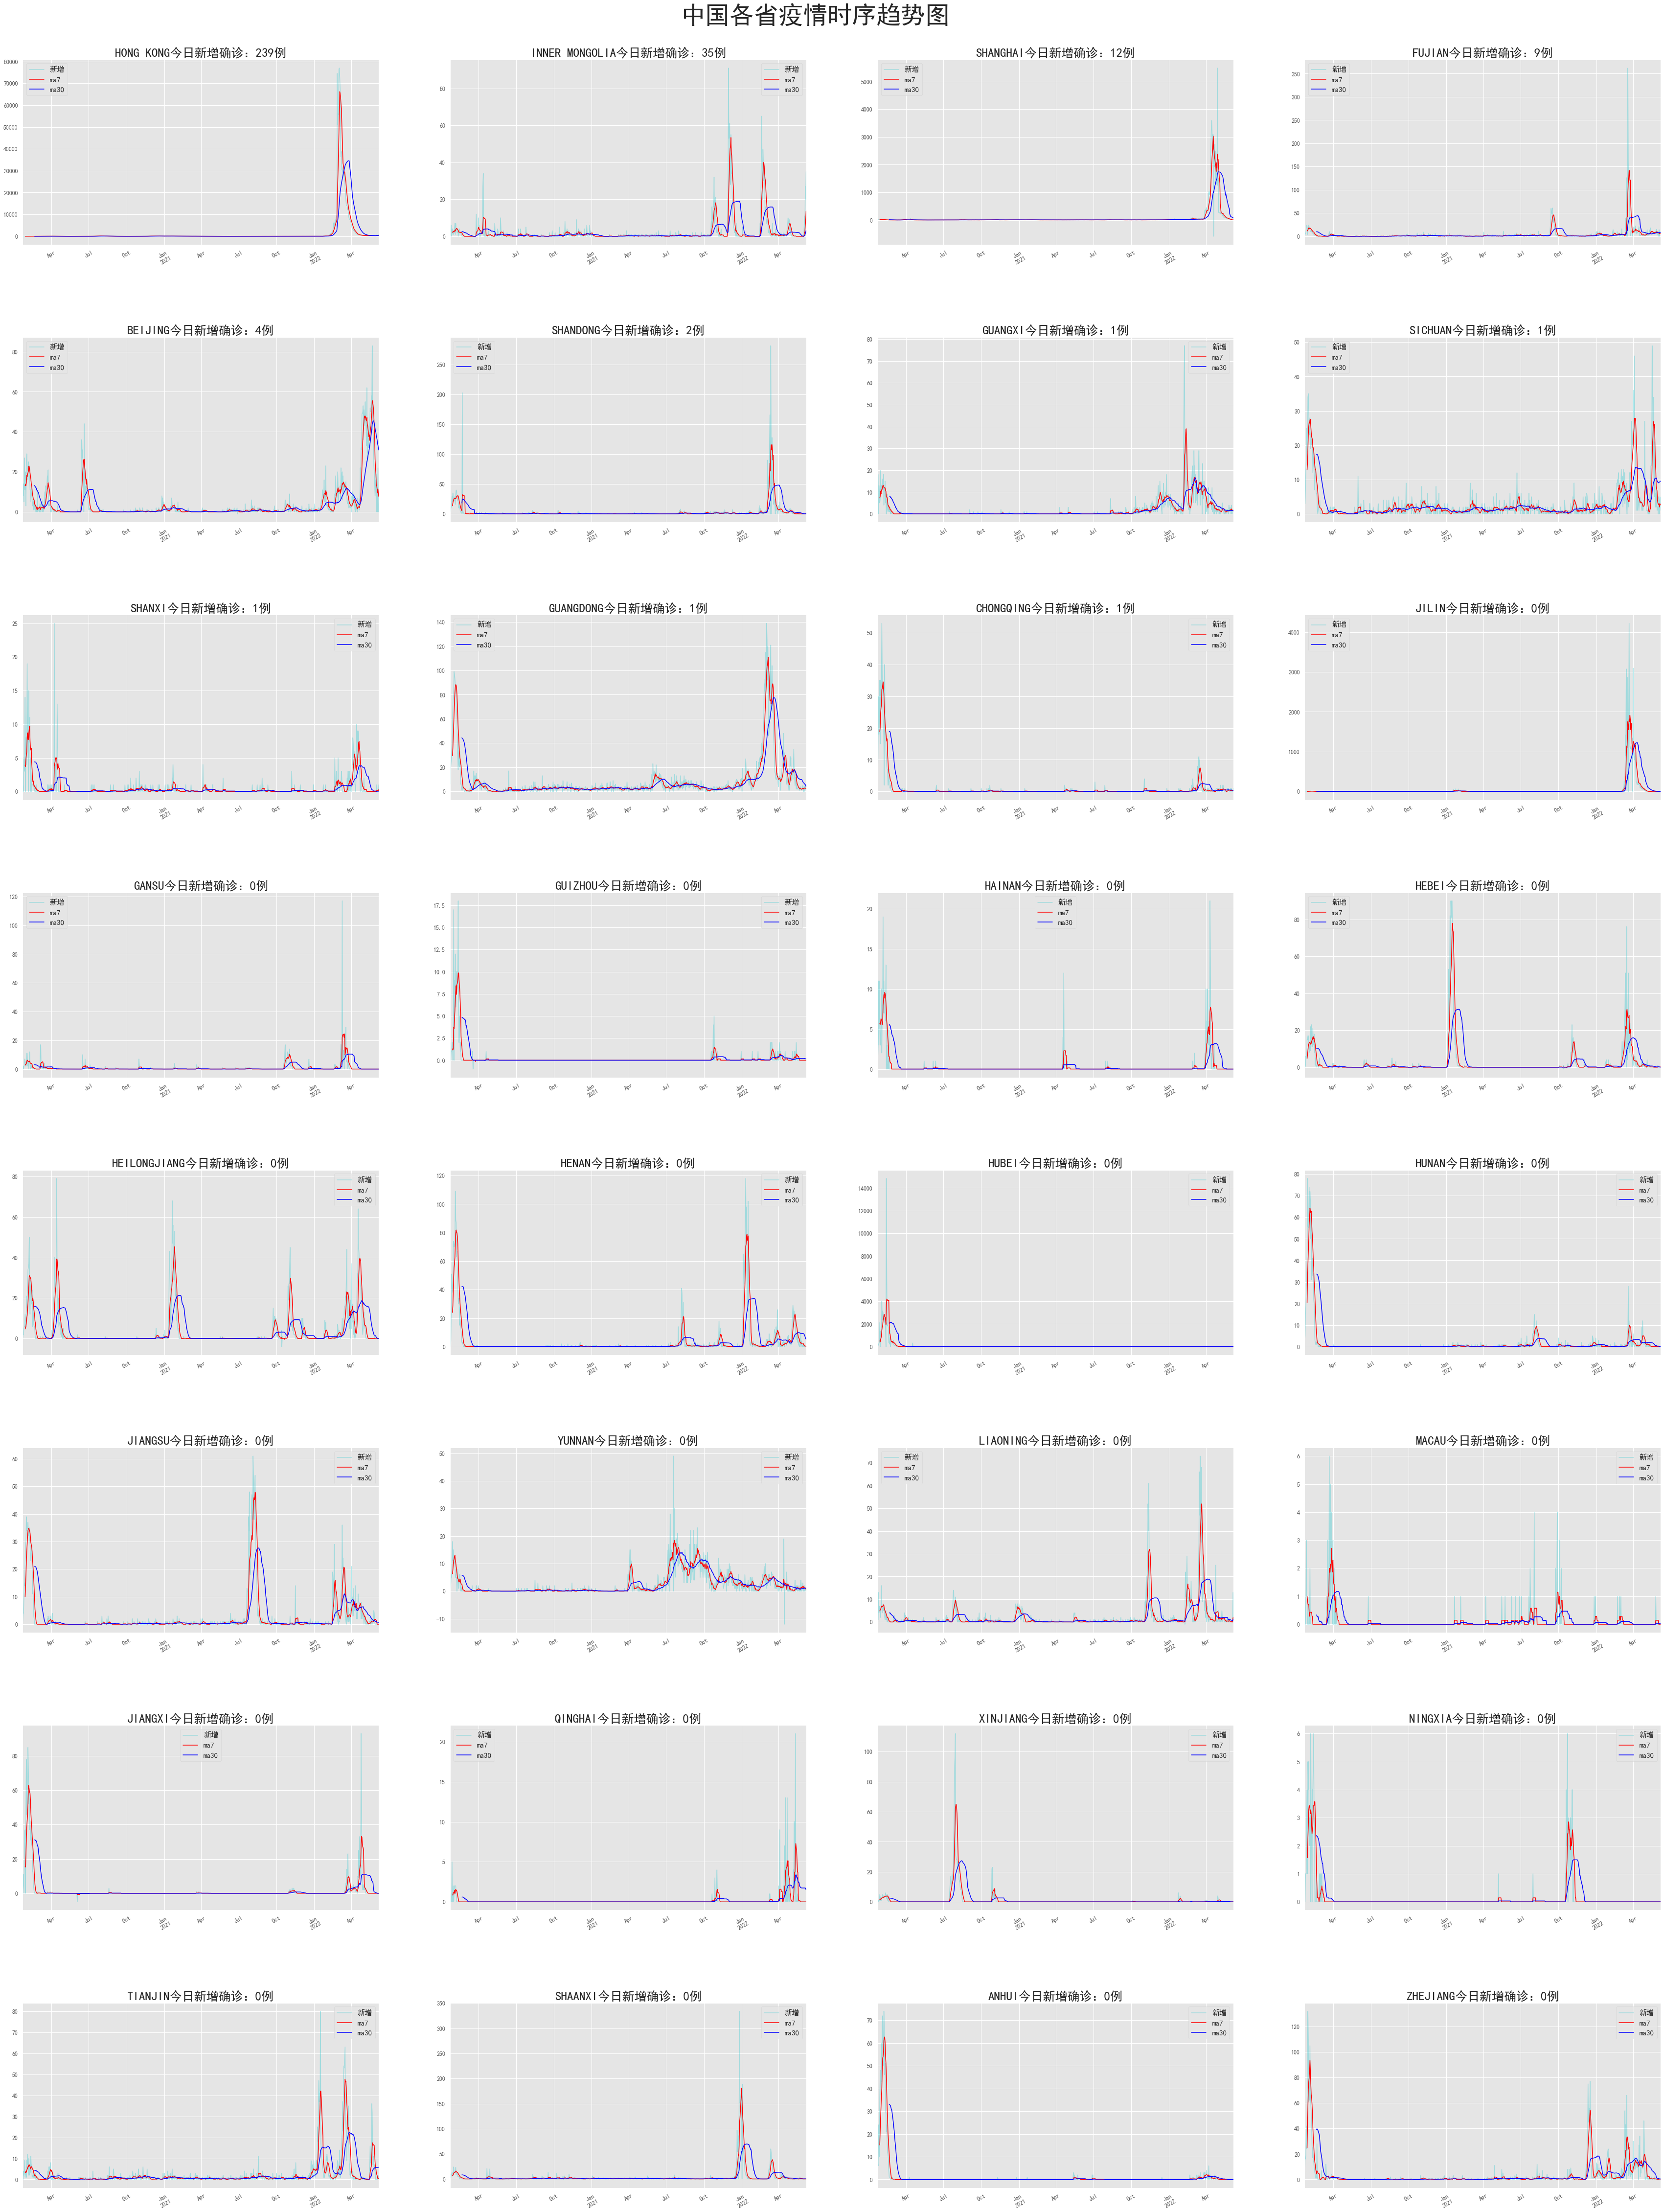

In [18]:
country = '中国'
ma = [7,30]
method = '新增'
kind = '确诊'



data_copy = ts_confirmed_CHINA_incre.copy()
data_copy = data_copy.drop(['Tibet'],axis=1).sort_values(axis=1, by =data_copy.index[-1],ascending=False)
plt.style.use('ggplot')
fig, axs = plt.subplots(nrows=8, ncols=4, figsize=(15*4, 10*8))
plt.subplots_adjust(hspace=0.5)
plt.suptitle(f"{country}各省疫情时序趋势图", fontsize=50, y = 0.9)
for province,ax in zip(data_copy.columns, axs.ravel()):
    data_copy[province].plot(ax=ax,rot = 30, fontsize = 12,alpha = .3, label = method, color = '#06c3cc')
    data_copy[province].rolling(ma[0]).mean().plot(ax=ax,rot = 30, fontsize = 12,label = f'ma{ma[0]}',color = 'red')
    data_copy[province].rolling(ma[1]).mean().plot(ax=ax,rot = 30, fontsize = 12,label = f'ma{ma[1]}',color = 'blue')
    ax.set_title(f"{province.upper()}今日新增{kind}：{int(data_copy[province].tail(1))}例",fontsize = 25)
    ax.legend(fontsize = 15)
    ax.set_xlabel("")
plt.show()

<div class="alert alert-block alert-success"><b>Step 5 Plot US TS Trends by State</b>
    
现在，请尝试根据上面代码，利用 ts_confirmed_US_incre 绘制一个美国各州的疫情时序趋势图吧！
</div>

现在，我们把眼光放在某个具体的省或者州上，我们着重研究上海的数据，那么这时最好采用plotly，可以实现交互式可视化！

In [19]:
data_copy1 = ts_confirmed_US_incre

specify = 'New York'
idx = data_copy1.index
ser = data_copy1[specify]
layout_title = specify.upper()
kind = '确诊'
method = '新增'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}数',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}天移动平均',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}天移动平均',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)


plotdata = [trace,trace1,trace2]

'''启动绘图'''

x_axis_config = {'title': '日期'}
y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

当然，我知道这个代码挺长的，第一次上手的话，可能看的不是很懂，听鲸鲸一句劝，要懂得照葫芦画瓢。

Python画图和咱们用笔画画是一样的，这里有三条线，那么就是3个trace，每个都代表一条线。

然后再把3条线画到一个图里，bingo！

<div class="alert alert-block alert-success"><b>Step 6 Plot Shanghai TS Trend Using Plotly</b>
    
现在，请尝试根据上面代码，利用 ts_confirmed_CHINA_incre 绘制一个上海的疫情时序趋势图吧！（使用Plotly）
</div>

<div class="alert alert-block alert-danger">
<b>注意：</b>

以上的三个获取数据的函数，我写在一个python模块中，叫做`getdata`。
    
大家在直接调用`getdata.py`文件即可！
    
</div>

In [20]:
"你的答案！"

### 结果分析

大家做数据分析的过程中，很容易注重过程，却忽视了结果。

恰恰相反，领导眼里，我们怎么实现的他并不关注，他关注的这一大堆有的没的到底能量化给到一个什么样的结果。

这个结果是否满足下列条件：

1. 合理
2. 有效
3. 可行

所以，我们来看看根据这些数据，我们能得到什么结果。


先来看看中国自疫情以来，整个疫情的发展趋势和重要节点

In [21]:
data_copy1 = ts_confirmed_CHINA_incre

specify = '中国'
idx = data_copy1.index
ser = data_copy1.sum(axis=1)
layout_title = specify.upper()
kind = '确诊'
method = '新增'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}数',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}天移动平均',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}天移动平均',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)


plotdata = [trace,trace1,trace2]

'''启动绘图'''

x_axis_config = {'title': '日期'}
y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

上面这个图来看，好像在22年的2月3月左右出现了一波暴增，那是因为咱们香港不听话，非得摆烂，学英国那一套，直接把自己玩崩了，这曲线着实吓人。

那么，我们把香港先排除在外，看看大陆的趋势如何。

In [22]:
data_copy1 = ts_confirmed_CHINA_incre

specify = '中国大陆'
idx = data_copy1.index
ser = data_copy1.drop('Hong Kong',axis=1).sum(axis=1)
layout_title = specify.upper()
kind = '确诊'
method = '新增'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}数',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}天移动平均',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}天移动平均',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)



plotdata = [trace,trace1,trace2]

'''启动绘图'''

x_axis_config = {'title': '日期'}
y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

这个曲线就比较合理哈，首先是武汉在2020年初爆发了疫情，在2月13那天单日新增确诊15k多，可怕！我们zoom一下，看下具体情况！

但是隔了一天14日那天就单日新增减半，只有6k多，这就是爱的力量么💋

可以看出这一波激增很反常，上的快，下的也快，这说明刚开始的这个毒株传染性极强，而且我们也是控制地非常好，在极短的时间内就把易感人数控制在可控范围之内（估计是封城的原因）。

到了三月，我们日增降至几百，最后到几十，抗疫第一阶段结束，大家开启了持久战，一直到4月17日，出现了一波小的上扬，检查了一下是湖北当天新增了325例，但是当天新闻并没有报道，强调了反弹是发生在黑龙江，确实所报道的数据和我们得到的数据是基本吻合的，黑龙江省确实出现了10个新增。

看一下当天的新闻吧！

（大家在发现异常情况时，要多去找信息去佐证或者推翻我们所利用数据获得的信息，要知道我们所有的分析决策都来自于数据本身，所以数据有问题的话，再怎么分析也都是徒劳！）

In [23]:
IFrame(width="853",height="480",src = "https://player.youku.com/embed/XNDYzODE1MzEzMg==")

可以看到，后面一直到22年初，中国一直保持的很不错，基本日均增加在个位数，并没有被传染性更强的 delta 毒株所严重影响。

> 德尔塔（Delta），是新冠病毒变异毒株。最早于2020年10月在印度发现。2021年5月，世卫组织将最早在印度发现的新冠病毒变异毒株B.1.617.2命名为“德尔塔”变体。

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataAnalysisProject/blob/master/pic/china_covid.png?raw=true width='800' />
</div>

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataAnalysisProject/blob/master/pic/shanghai_covid.png?raw=true width='800' />
</div>

In [24]:
IFrame(width="853",height="480",src = "https://www.youtube.com/embed/8qB9HRwFTo0")

那我们再来看看漂亮国的数据是不是像中国这么漂亮！

In [25]:
data_copy1 = ts_confirmed_US_incre

specify = '美国'
idx = data_copy1.index
ser = data_copy1.sum(axis=1)
layout_title = specify.upper()
kind = '确诊'
method = '新增'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}数',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}天移动平均',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}天移动平均',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)


plotdata = [trace,trace1,trace2]

'''启动绘图'''

x_axis_config = {'title': '日期'}
y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')

<div class="alert alert-block alert-success"><b>Step 7 Plot US TS Deaths Trends</b>
    
请尝试画出美国死亡时序趋势图吧！
</div>

In [ ]:
"你的答案！"

<div align=center>
<img src=https://github.com/datoujinggzj/WhaleDataAnalysisProject/blob/master/pic/us_covid.png?raw=true width='800' />
</div>

但是近日，从2022年3月中旬开始，上海陆续有小区开始进行管控，在仅仅10几天内，上海彻底沦陷。

向大家介绍一下上海的疫情社区管理模式：

1、封控区

病例和无症状感染者的居住地所在小区及活动频繁的周边地区可划为封控区。

病例发病前2天或无症状感染者检测阳性前2天起至隔离管理前，如其对工作地、活动地等区域人员造成传播的可能性较高，且密切接触者、密接的密接追踪判定难度较大，也可将相关区域划为封控区。

封控区可精准划分至小区(自然村组)、楼栋、单元等，实行“区域封闭、足不出户、服务上门"。

2、管控区

病例发病前2天或无症状感染者检测阳性前2天起至隔离管理前，如其对工作地、活动地等区域人员具有一定传播风险，且其密切接触者、密接的密接追踪判定难度较大，将相关区域划为管控区。

管控区可精准划分至小区(自然村组)、楼栋、单元等，实行“人不出区、严禁聚集”。

管控区内发现核酸检测阳性者立即转为封控区。

3、防范区

县(区)内封控区、管控区以外的区域均为防范区。

实行“强化社会面管控，严格限制人员聚集"。

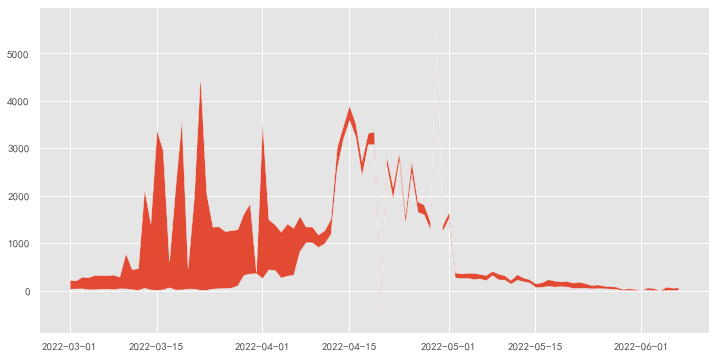

In [26]:
data_copy1 = ts_confirmed_CHINA_incre[ts_confirmed_CHINA_incre.index>='2022-03-01']

specify = '中国大陆 vs. 上海'
idx = data_copy1.index
ser = data_copy1.drop('Hong Kong',axis=1).sum(axis=1)
layout_title = specify.upper()
kind = '确诊'
method = '新增'
ma = [7,30]

trace = go.Scatter(
            x = idx,
            y = ser,
            mode = 'lines+markers',
            name = f'{method}{kind}数',
            opacity = .8,
            line=dict(color="#08a8c4",width = .4),
            marker = dict(color = '#5857e1',size = 1.2)
        )
trace1 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[0]).mean(),
    mode = 'lines+markers',
    name = f'{ma[0]}天移动平均',
    opacity = .6,
    line=dict(color="#ee5090",width = 1.4),
    marker = dict(color = '#dd001b',size = 2.2)
)
trace2 = go.Scatter(
    x = idx,
    y = ser.rolling(ma[1]).mean(),
    mode = 'lines+markers',
    name = f'{ma[1]}天移动平均',
    opacity = .8,
    line=dict(color="#006eff",width = 2.4),
    marker = dict(color = '#412b63',size = 3.2)
)

trace3 = go.Scatter(
    x = idx,
    y = data_copy1['Shanghai'],
    mode = 'lines+markers',
    name = '上海新增数',
    opacity = .8,
    line=dict(color="#f3832c",width = 1.4),
    marker = dict(color = '#d90013',size = 3.2)
)


plotdata = [trace,trace1,trace2,trace3]

'''启动绘图'''

x_axis_config = {'title': '日期'}
y_axis_config = {'title': f'{kind}数（{method.upper()}）'}
# 返回指定的图像布局和配置对象
my_layout = Layout(title=f"【{layout_title}】近日【{kind}】数时间序列折线图（{method.upper()}）2022年3月至今",
                   xaxis=x_axis_config, yaxis=y_axis_config)
# 生成图表
offline.iplot({'data': plotdata, 'layout': my_layout}, filename=f'{layout_title}_COVID_TS',image_height=500,image_width=1000,image = 'png')





data_copy1 = ts_confirmed_CHINA_incre[ts_confirmed_CHINA_incre.index>='2022-03-01']
plt.figure(figsize = [12,6])
plt.fill_between(x = idx, 
                 y1 = data_copy1.drop('Hong Kong',axis=1).sum(axis=1),
                 y2 = data_copy1['Shanghai'],animated=True)

可以看到上海和全国的疫情新增数越来越接近，尤其是4月开始，基本80%到90%的新增数是由上海贡献！

在4月15日达到峰值，并没有发生突破，希望能够迎来真正的拐点！